## <b>Описание данных и задания </b>

### <b>Техническое задание </b>

#### <b>Описание</b>

<br>Задача от обсерватории «Небо на ладони»: придумать, как с помощью нейросети определять температуру на поверхности обнаруженных звёзд. Обычно для расчёта температуры учёные пользуются следующими методами:
<br>
<br>● Закон смещения Вина.
<br>● Закон Стефана-Больцмана.
<br>●Спектральный анализ.
<br>
<br>Каждый из них имеет плюсы и минусы. Обсерватория хочет внедрить технологии машинного обучения для предсказания температуры звёзд, надеясь, что этот метод будет наиболее точным и удобным.
В базе обсерватории есть характеристики уже изученных 240 звёзд.

#### <b>6_class.csv</b>

Характеристики звезд в таблице.
<br>● Unnamed: 0 - уникальный номер звезды.
<br>● Temperature (K) - температура на поверхности звезды в Кельвинах (целевой признак).
<br>● Luminosity(L/Lo) - светимость звезды относительно Солнца.
<br>● Radius(R/Ro) - радиус звезды относительно радиуса Солнца.
<br>● Absolute magnitude(Mv) - физическая величина, характеризующая блеск звезды.	
<br>● Star type - тип звезды:
<br>- Коричневый карлик - 0
<br>- Красный карлик - 1
<br>- Белый карлик - 2
<br>- Звёзды главной последовательности - 3
<br>- Сверхгигант - 4
<br>- Гипергигант - 5
<br>● Star color - цвет звезды, который определяют на основе спектрального анализа:
<br>- white
<br>- red
<br>- blue
<br>- yellow
<br>- yellow-orange

<br>Справочная информация:
<br>Светимость Солнца (англ. Average Luminosity of Sun)
<br>L0=3.828 * 10^26 Вт
<br>Радиус Солнца (англ. Average Radius of Sun) 
<br>R0 = 6.9551 * 10^8 м

## <b>Импорт библиотек и функций</b>

#### <b>Библиотеки</b>

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Загрузка и обработка данных.
import os

import pandas as pd 

import numpy as np

#Визуализация данных
from matplotlib import pyplot as plt

import seaborn as sns

import matplotlib.pyplot as mp

from phik.report import plot_correlation_matrix

#Подготовка данных
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

#Библиотека для создания НС
import torch

import torch.nn as nn

#Фиксация результатов
import random
SEED = 42 

torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True 
torch.backends.cudnn.benchmark = False 

#Прочее
import warnings
warnings.filterwarnings('ignore')

#### <b>Функции</b>

In [3]:
#---Разделение---
line = '-'*132
#--------------------------------------------------------------------------------------------------------------------------------------------------
#---Информация о таблице---
def percentage_passes (dataset):
    print(dataset.info())
    print(line)
    print('Количество пропущенных значений таблицы:')
    for col in dataset.columns:
        datcol = np.mean(dataset[col].isnull())
        print(col, datcol)  
        
    print(line)
    print('Количество дубликатов -', dataset.duplicated().sum())
#--------------------------------------------------------------------------------------------------------------------------------------------------
___#Визуализация данных___
#---Диограмма---
def data_analysis (variable, column):
    means = variable[column].mean()
    medians = variable[column].median()
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].axvline(x=means, color='green')
    axes[0].axvline(x=medians, color='red')
    axes[0].legend(['Среднее значение - {:.2f}'.format(means),
                    'Медианное значение - {:.2f}'.format(medians)])
    axes[0].set_title(f'Гистограмма для - {column}', fontsize=15)
    axes[0].set_ylabel('Количество', fontsize=10)
    
    sns.histplot(variable, bins=20, kde=True, ax=axes[0], x=column)
    axes[1].set_title(f'График ящик с усами для - {column}', fontsize=15)
    sns.boxplot(data=variable, ax=axes[1], y=column)
    axes[1].set_ylabel(column, fontsize=10)
    plt.show()
#---Столбчатая диограмма---
def direct_diagram(variable, column):
    display(variable[column].unique())
    plt.figure(figsize=(8,6))
    plot = sns.countplot(y=column, data=variable)
    plot.set_title(f'Рапределение по - {column}', fontsize=15)
    plot.set_xlabel('Количество', fontsize=10)
    plt.show()
#---Сравнение---
def comparison_chart(y_pred):
    start = 0
    end = 60
    
    basic_df = y_test[start:end]
    nn_df = y_pred[start:end]

    plt.figure(figsize=(15, 7))
    plt.bar(range(start, end), nn_df.detach().numpy(), color='blue', label='Прогноз')
    plt.bar(range(start, end), basic_df, color='orange', width=0.4, label='Факт')

    plt.legend()
    plt.title('Факт-прогноз', fontsize=17)
    plt.xlabel('Номер звезды', fontsize=12)
    plt.ylabel('Температура звезды', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
#--------------------------------------------------------------------------------------------------------------------------------------------------
#---Разделение на тест и трейн---
def train_test_ (df, valid, TEST_SIZE):
    X = df.drop([valid], axis=1)
    y = df[valid]

    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=TEST_SIZE, random_state = RANDOM_STATE)
    print(f"Строк в тренировочном датасете - {len(X_train)}") 
    print(line)
    print(f"Строк в тестовом датасете - {len(X_test)}")

    return X_train, X_test, y_train, y_test

## <b>Загрузка и изучение данных</b>

In [4]:
data_1 = '6_class.csv'
data_2 = '/datasets/6_class.csv'
    
if os.path.exists(data_1):
    loading_1 = pd.read_csv(data_1)
elif os.path.exists(data_2):
    loading_1 = pd.read_csv(data_2)
else:
    print('Something is wrong')

In [5]:
data = loading_1

In [6]:
data.head()

,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,3068,0.002400,0.1700,16.12,0,Red
1,1,3042,0.000500,0.1542,16.60,0,Red
2,2,2600,0.000300,0.1020,18.70,0,Red
3,3,2800,0.000200,0.1600,16.65,0,Red
4,4,1939,0.000138,0.1030,20.06,0,Red


In [7]:
percentage_passes(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              240 non-null    int64  
 1   Temperature (K)         240 non-null    int64  
 2   Luminosity(L/Lo)        240 non-null    float64
 3   Radius(R/Ro)            240 non-null    float64
 4   Absolute magnitude(Mv)  240 non-null    float64
 5   Star type               240 non-null    int64  
 6   Star color              240 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 13.2+ KB
None
------------------------------------------------------------------------------------------------------------------------------------
Количество пропущенных значений таблицы:
Unnamed: 0 0.0
Temperature (K) 0.0
Luminosity(L/Lo) 0.0
Radius(R/Ro) 0.0
Absolute magnitude(Mv) 0.0
Star type 0.0
Star color 0.0
------------------------------------------------

In [8]:
print('Неявные дубликаты столбца - Star color:',data['Star color'].unique())
print(line)
print('Неявные дубликаты столбца - Star type:', data['Star type'].unique())

Неявные дубликаты столбца - Star color: ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']
------------------------------------------------------------------------------------------------------------------------------------
Неявные дубликаты столбца - Star type: [0 1 2 3 4 5]


<b>Вывод</b>
<br>Таблица 6_class.csv (data) имеет 7 столбцов и 240 строк.
<br>Пропусков и явных дубликатов нет. В столбце Star color есть неявные дубликаты.

## <b>Обработка дынных</b>

Для начала првиеду названия столбцов в более удобный вид. 

In [9]:
data.rename(columns={'Unnamed: 0': 'unnamed', 'Temperature (K)': 'temperature_k', 
                            'Luminosity(L/Lo)': 'luminosity', 'Radius(R/Ro)': 'radius', 
                            'Absolute magnitude(Mv)': 'absolute_magnitude_mv', 'Star type': 'star_type', 
                           'Star color': 'star_color'}, inplace=True)

Так-же приведу в удобный вид и записи в столбце  <b>star_color</b>

In [10]:
data['star_color'] = data['star_color'].str.lower()

Теперь исправлю неявные дубликаты. Это будет сложнее так-как выяснилось что цвета звезд записаны не только с разным регистром а ещё и с точки зрения видимого и истинного цвета звезды.

In [11]:
color_stars = {'температура_K' : ['30000-60000', '10000-30000', '7500-10000', '6000-7500', '5000-6000', '3500-5000', '2000-3500'],
               'истинный_цвет' : ['голубой', 'бело-голубой', 'белый', 'жёлто-белый', 'жёлтый', 'оранжевый', 'красный'],
               'видимый_цвет' : ['голубой', 'бело-голубой и белый', 'белый', 'белый', 'жёлтый', 'желтовато-оранжевый', 'оранжево-красный']}

color_stars = pd.DataFrame(color_stars)
color_stars

,температура_K,истинный_цвет,видимый_цвет
0,30000-60000,голубой,голубой
1,10000-30000,бело-голубой,бело-голубой и белый
2,7500-10000,белый,белый
3,6000-7500,жёлто-белый,белый
4,5000-6000,жёлтый,жёлтый
5,3500-5000,оранжевый,желтовато-оранжевый
6,2000-3500,красный,оранжево-красный


По таким признакам получается что к примеру значения <b>red</b> и <b>Orange-Red</b> это так-же неявный дубликат. В качестве истиных значений возьму значения из истинного цвета звезды. 

In [12]:
data['star_color'] = data['star_color'].replace('orange-red', 'red')

duplicates_1 = ['Blue White', 'blue white', 'blue white ', 'Blue-white'] 
name_1 = 'blue-white' 
data['star_color'] = data['star_color'].replace(duplicates_1, name_1)

duplicates_2 = ['pale yellow orange', 'yellow-white', 'yellowish'] 
name_2 = 'white-yellow' 
data['star_color'] = data['star_color'].replace(duplicates_2, name_2)

data['star_color'] = data['star_color'].replace('yellowish white', 'yellow')
data['star_color'] = data['star_color'].replace('blue ', 'blue')
data['star_color'] = data['star_color'].replace('whitish', 'white')

In [13]:
data['star_color'].unique()

array(['red', 'blue-white', 'white', 'yellow', 'white-yellow', 'blue',
       'orange'], dtype=object)

In [14]:
data.set_index('unnamed', inplace=True)

<b>Вывод</b>
<br>Названия столбцов а так-же записи в столбце <b>star_color</b> приведены в нормальный вид. Обработаны неявные дуликаты а так-же столбец <b>unnamed</b> переведен в индекс датасета.

## <b>Исследовательский анализ</b>

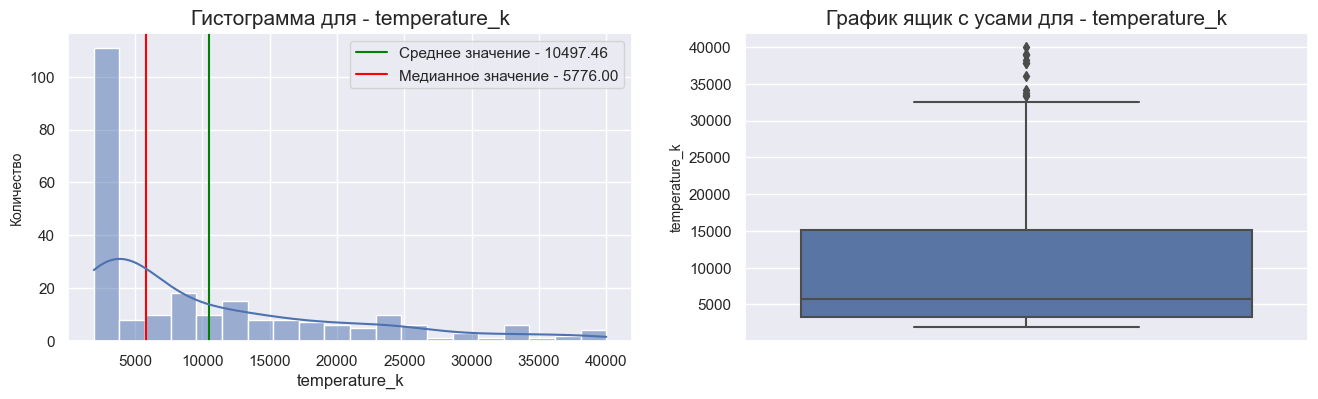

In [15]:
data_analysis(data,'temperature_k')

Температура множества звёзд меньге 5000k. Есть выбросы и начинаются они примерно с 33000k. Посмотим же сколько звезд с цветом <b>blue</b>.

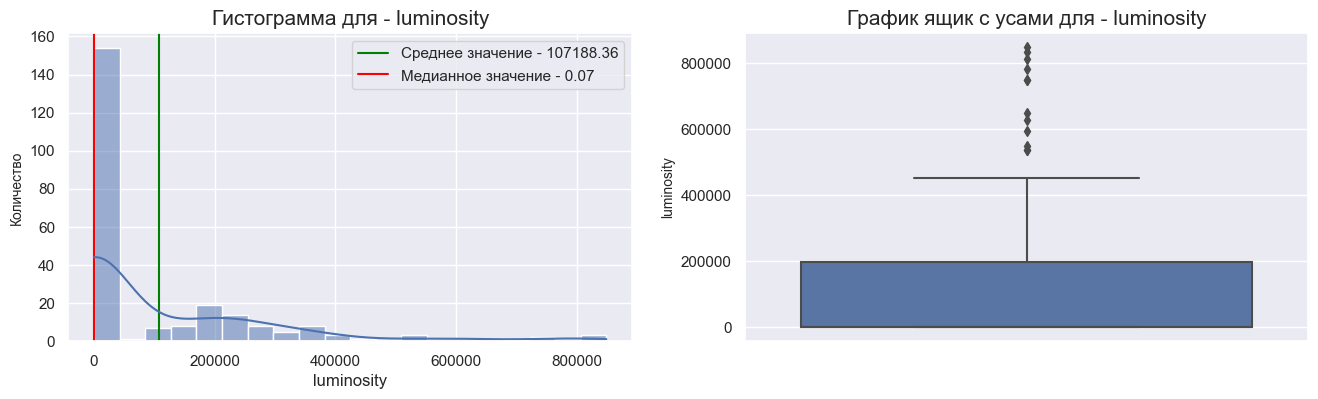

In [16]:
data_analysis(data,'luminosity')

Светимость звезды видимо хорошо связано с её температурой. Так-как график очень похож на график температуры большая часть звёзд имеет светимость меньше 10000.

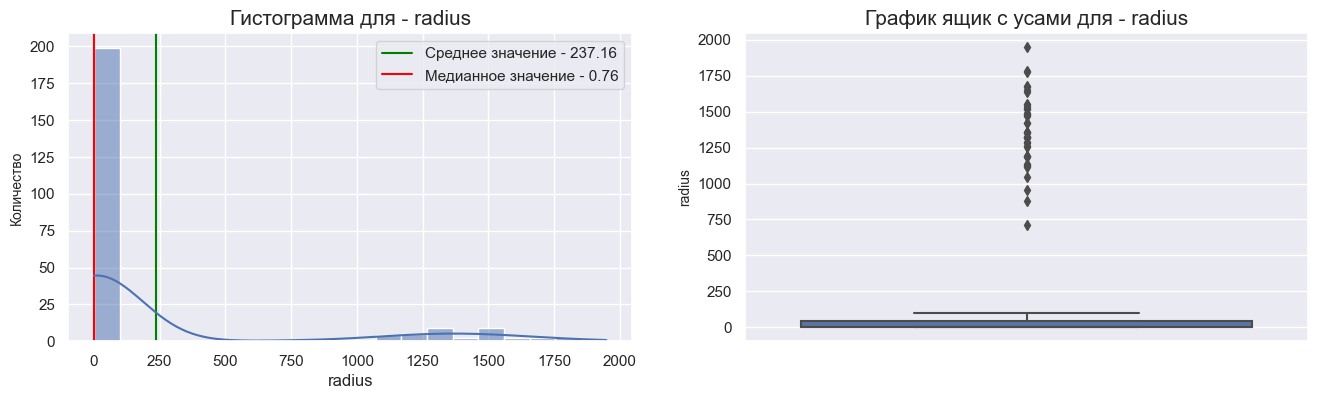

In [17]:
data_analysis(data,'radius')

Есть небольшое количество звёзд радиус которых привышает 1100. Звёзд размерами от 100 до 1100 нет. Почти все звезды размером меньше 100.

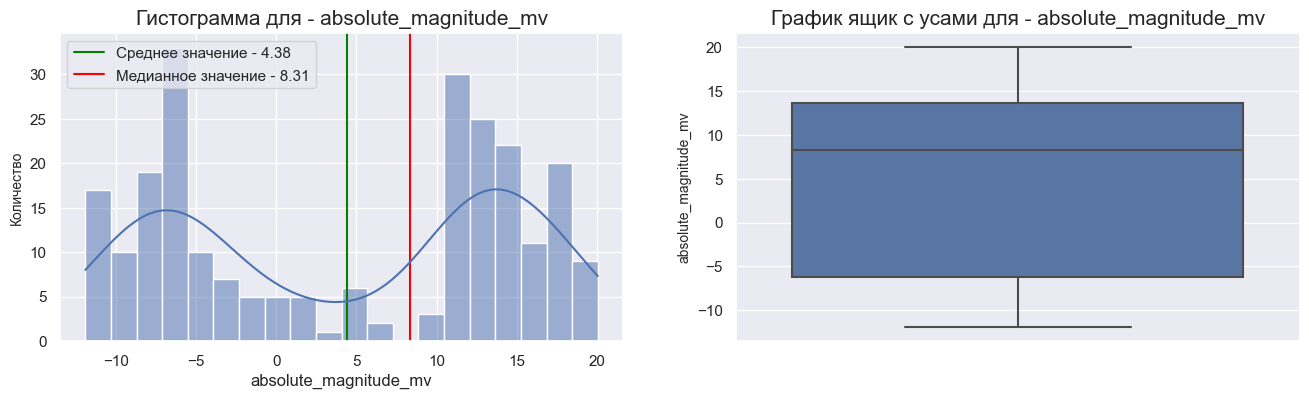

In [18]:
data_analysis(data,'absolute_magnitude_mv')

Блеск звёзд не имеет выбросы. Большая часть значений находится на отметках -5 и 10 - 15 эти отметки находятся примерно на середине в своих осях.

array([0, 1, 2, 3, 4, 5], dtype=int64)

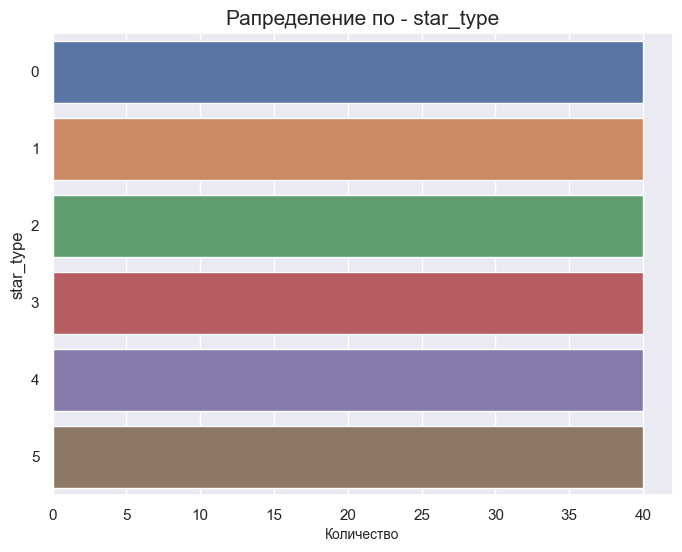

In [19]:
direct_diagram(data, 'star_type')

Тип звезды распределён равномерно.

array(['red', 'blue-white', 'white', 'yellow', 'white-yellow', 'blue',
       'orange'], dtype=object)

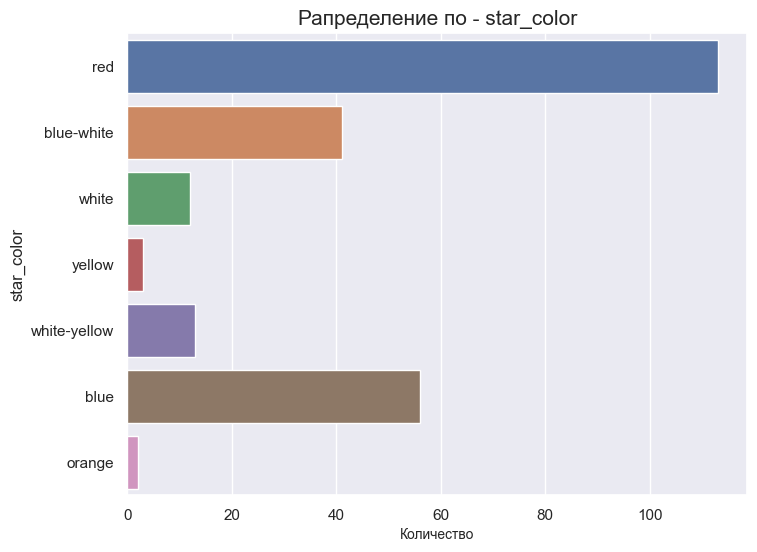

In [20]:
direct_diagram(data, 'star_color')

Топ 3 цвета звёзд - красный, синий, бело-синий. Самый редкий цвет - оранжевый.

Теперь посмотрю на взаимосвязь целевого признака с другими.

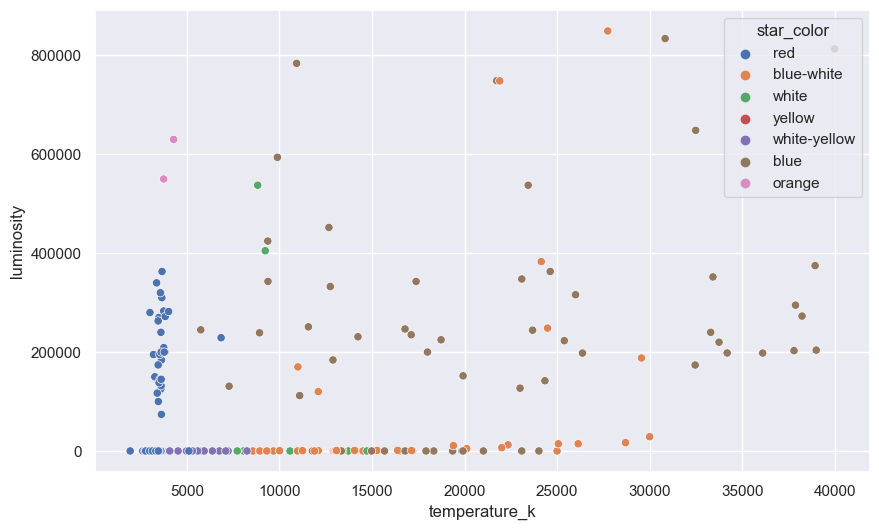

In [21]:
sns.scatterplot(data=data,x="temperature_k",y="luminosity",hue="star_color")
plt.gcf().set_size_inches(10, 6)

Низкая светимость звезды не привышает 30000k. Но не всегда звезда с высокой светимостью имеет большую температуру. Звёзды у корых светимость находиться на уровне 100000 - 400000 распределены по всей линии температуры.

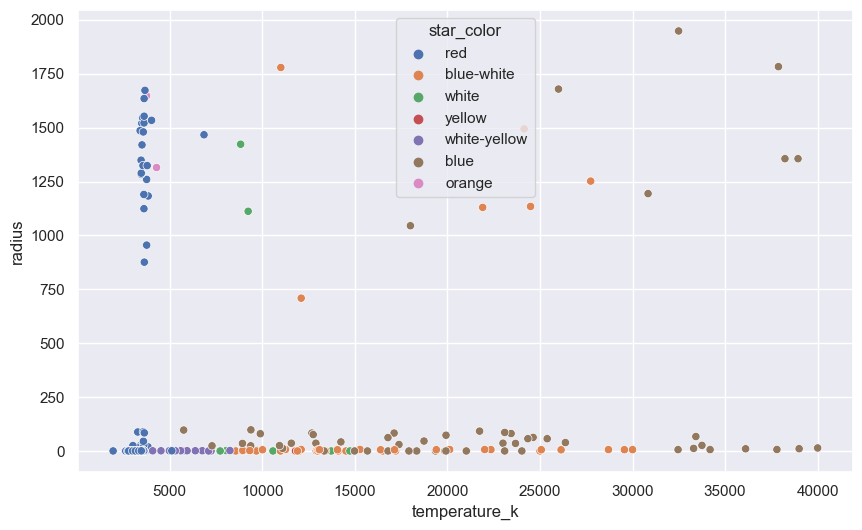

In [22]:
sns.scatterplot(data=data,x="temperature_k",y="radius",hue="star_color")
plt.gcf().set_size_inches(10, 6)

Можно сказать что взаимосвязи между радиусом и температурой нет. Есть звезды с малым радиусом и большой температурой а так-же звёзды большим радиусом и малой температурой.

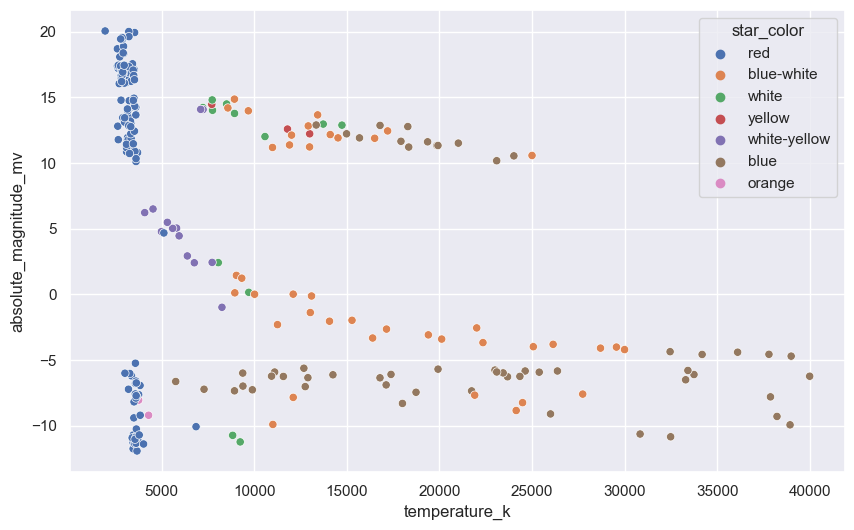

In [23]:
sns.scatterplot(data=data,x="temperature_k",y="absolute_magnitude_mv",hue="star_color")
plt.gcf().set_size_inches(10, 6)

А вот магнитуда уже хорошо взаимосвязана с температурой. На графике видно что чем магнитуда ниже, тем температура выше. Есть два отрезка которые это отлично показывают 20-10 и 5-(-10)

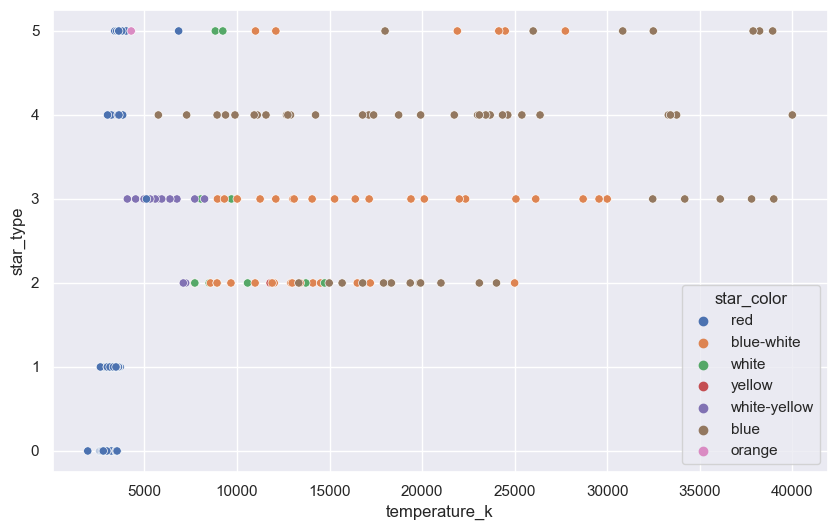

In [24]:
sns.scatterplot(data=data,x="temperature_k",y="star_type",hue="star_color")
plt.gcf().set_size_inches(10, 6)

Звёзды 0 и 1 типа не привышают 5000k, звёзды 2 типа наоборот всегда больше 5000k. Остальные 3 типа звёзд распределены равномерну по всему графику температуры.

<b>Вывод</b>
<br>Средняя звезда выглядит так - температура не выше 1000 градусов, низкая светимость, радиус не привышающий 250, показатель магнитуды от 5 до -10, красным или синим цветом. 
<br>Так-же можно выделить хорошую взаимосвязь между температурой и магнитудой. Чем ниже магнитуда тем выше температура звезды, так-же класс звёзд 3,4 и 5 могут достигать максимальной температуры в 40000k.

## <b>Матрица корреляции</b>

interval columns not set, guessing: ['temperature_k', 'luminosity', 'radius', 'absolute_magnitude_mv', 'star_type']


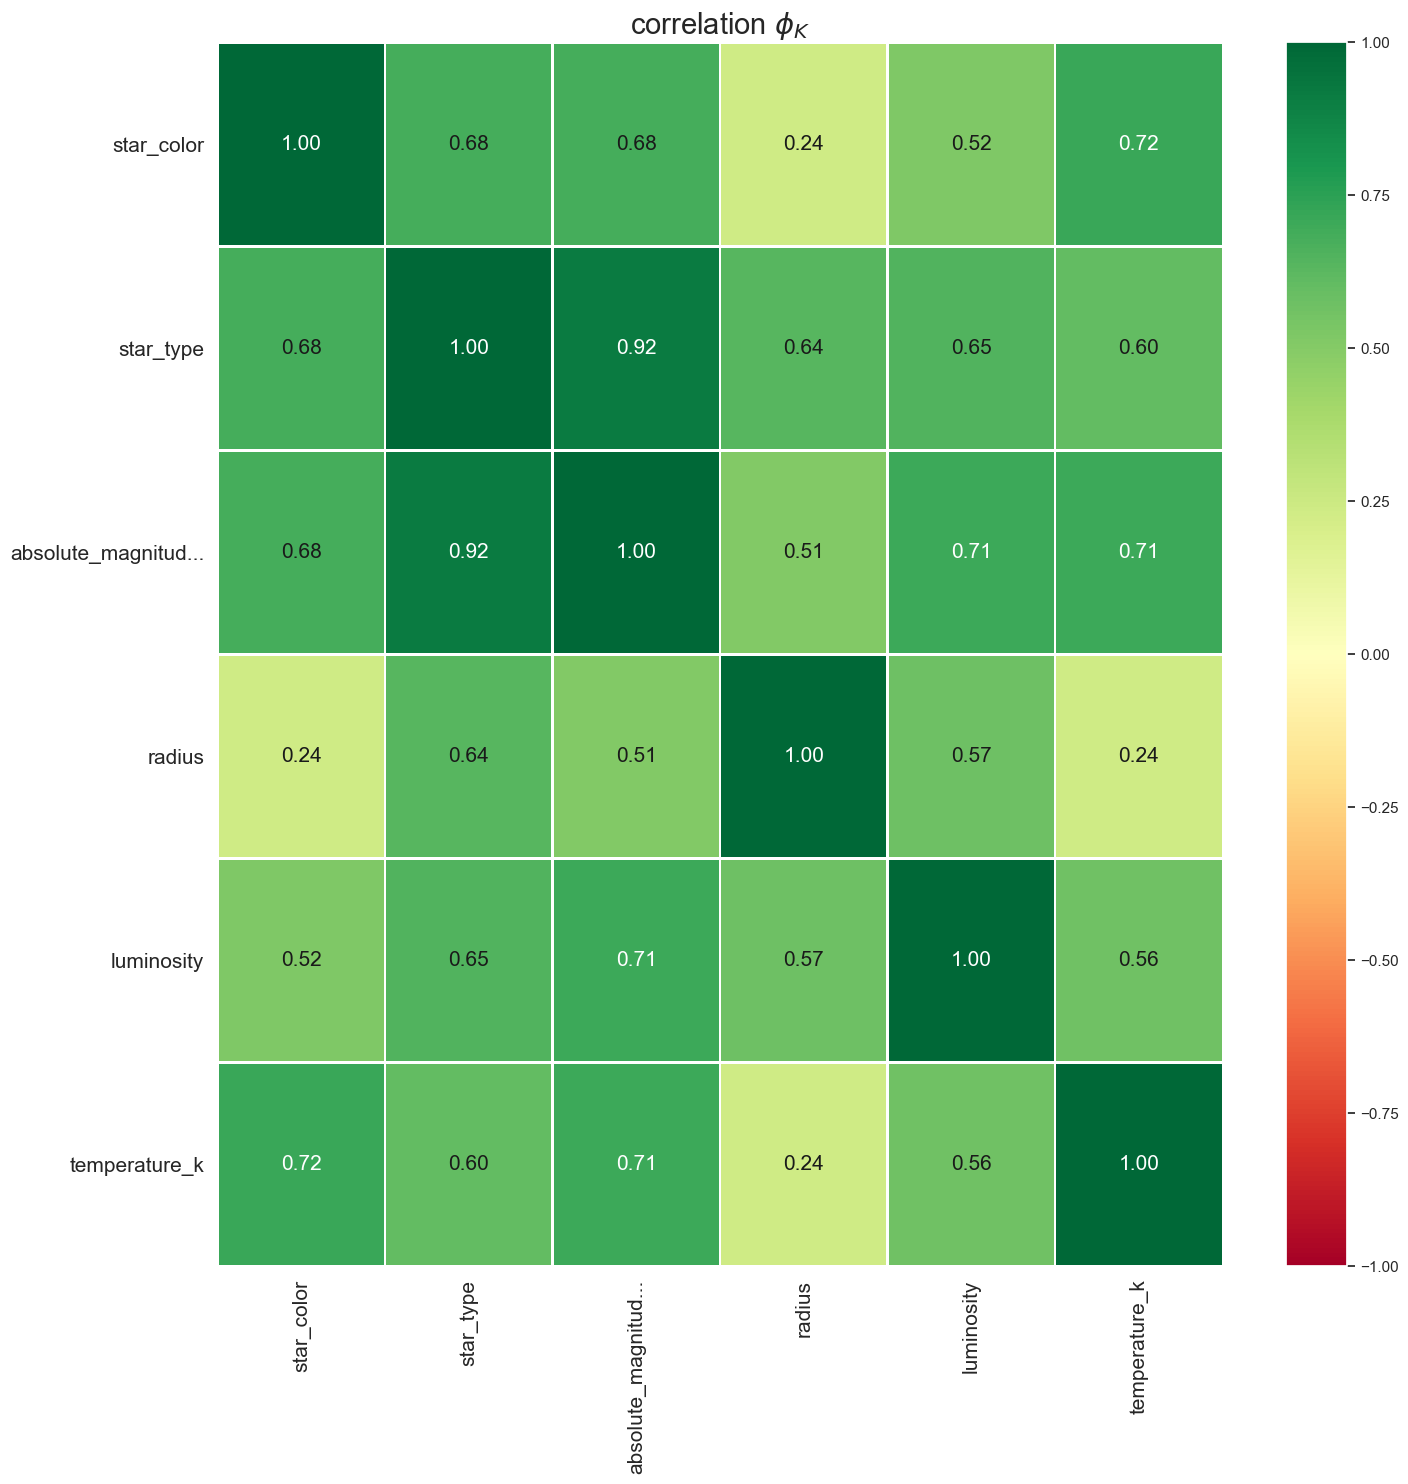

In [25]:
phik_overview = data.phik_matrix()

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(15, 15)
)

<b>Вывод</b>
<br>Видна хорошая корреляция между температурой и цветом звезды а так-жемагнитудой. Ещё видна отличная корреляция между магнитудой и типом звезды. 

## <b>Переработка данных</b>

Разделю данные та тестовую и тренировочную. 

In [26]:
 X_train, X_test, y_train, y_test = train_test_(data, 'temperature_k', 0.3)

Строк в тренировочном датасете - 168
------------------------------------------------------------------------------------------------------------------------------------
Строк в тестовом датасете - 72


In [27]:
X_train.head()

,luminosity,radius,absolute_magnitude_mv,star_type,star_color
unnamed,,,,,
29,0.00008,0.0130,14.08,2,white-yellow
124,0.00064,0.1090,17.12,0,red
75,0.00100,0.3500,11.76,1,red
82,0.00056,0.0095,13.78,2,white
5,0.00065,0.1100,16.98,0,red


Посмотрю все ли цвета и типы звезд вошли в тестовый и тренировочные датасеты.

In [28]:
print(f'Типы звезд в X_train - {X_train.star_type.unique()}')
print(line)
print(f'Типы звезд в X_test - {X_test.star_type.unique()}')
print(line)
print(f'Цвет звезд в X_train - {X_train.star_color.unique()}')
print(line)
print(f'Цыет звезд в X_test - {X_test.star_color.unique()}')

Типы звезд в X_train - [2 0 1 5 4 3]
------------------------------------------------------------------------------------------------------------------------------------
Типы звезд в X_test - [2 0 3 4 5 1]
------------------------------------------------------------------------------------------------------------------------------------
Цвет звезд в X_train - ['white-yellow' 'red' 'white' 'blue' 'blue-white' 'yellow' 'orange']
------------------------------------------------------------------------------------------------------------------------------------
Цыет звезд в X_test - ['blue-white' 'red' 'white-yellow' 'blue' 'orange' 'white' 'yellow']


In [29]:
cat_col_names = ['star_color']
num_col_names = ['luminosity', 'radius', 'absolute_magnitude_mv', 'star_type'] 

In [30]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False), cat_col_names),
        ('num', StandardScaler(), num_col_names)
    ], 
    remainder='passthrough'
) 

In [31]:
X_train = data_preprocessor.fit_transform(X_train)
X_test = data_preprocessor.transform(X_test)

Переведу данные в тензоры.

In [32]:
X_train = torch.FloatTensor(np.array(X_train))
y_train = torch.FloatTensor(np.array(y_train))
X_test = torch.FloatTensor(np.array(X_test))
y_test = torch.FloatTensor(np.array(y_test))

In [33]:
X_train.size()

torch.Size([168, 11])

In [34]:
X_test.size()

torch.Size([72, 11])

In [35]:
y_train.size()

torch.Size([168])

In [36]:
y_test.size()

torch.Size([72])

<b>Вывод</b>
<br>Таблца <b>data</b> была разделена на тестовую и тренировочные выборки. Все виды звёзд были разделены. Данные были обработаны для обучения. Данные переведены в тензоры.

## <b>Построение простой модели нейронной сети — baseline</b>

Создание класса.

In [37]:
class Net(nn.Module):
    def __init__(self, n_in, n_1, n_2, n_out):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(n_in, n_1)
        self.act1 = nn.Tanh()
        self.fc2 = nn.Linear(n_1, n_2)
        self.act2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(n_2, n_out)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)

        return(x)

Параметры сети.

In [38]:
n_in = X_train.shape[1]
n_1 = 150
n_2 = 75
n_out = 1 

model = Net(n_in, n_1, n_2, n_out) 
optimizer = torch.optim.Adam(model.parameters(), lr =1e-3)
loss = nn.MSELoss()

num_epochs = 8000

Обучение

In [39]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds_train = model.forward(X_train).flatten()
    
    rmse_train = torch.sqrt(loss(preds_train, y_train)) 
    rmse_train.backward()
    optimizer.step()
    
    if epoch % 1000 == 0 or epoch == num_epochs - 1:
        model.eval()
        predict_test = model.forward(X_test).flatten()
        rmse_test = torch.sqrt(loss(predict_test, y_test))
        print('Эпоха №', epoch)
        print('RMSE эпохи -', torch.sqrt(loss(predict_test, y_test)).item(), '\n') 

Эпоха № 0
RMSE эпохи - 14695.5869140625 

Эпоха № 1000
RMSE эпохи - 6962.001953125 

Эпоха № 2000
RMSE эпохи - 5208.326171875 

Эпоха № 3000
RMSE эпохи - 5041.6923828125 

Эпоха № 4000
RMSE эпохи - 5102.453125 

Эпоха № 5000
RMSE эпохи - 4926.6083984375 

Эпоха № 6000
RMSE эпохи - 4745.4228515625 

Эпоха № 7000
RMSE эпохи - 4590.0615234375 

Эпоха № 7999
RMSE эпохи - 4636.60302734375 



Обучение завершилось на RMSE 4636. Лучшее RMSE было на 7000 эпохе - 4590

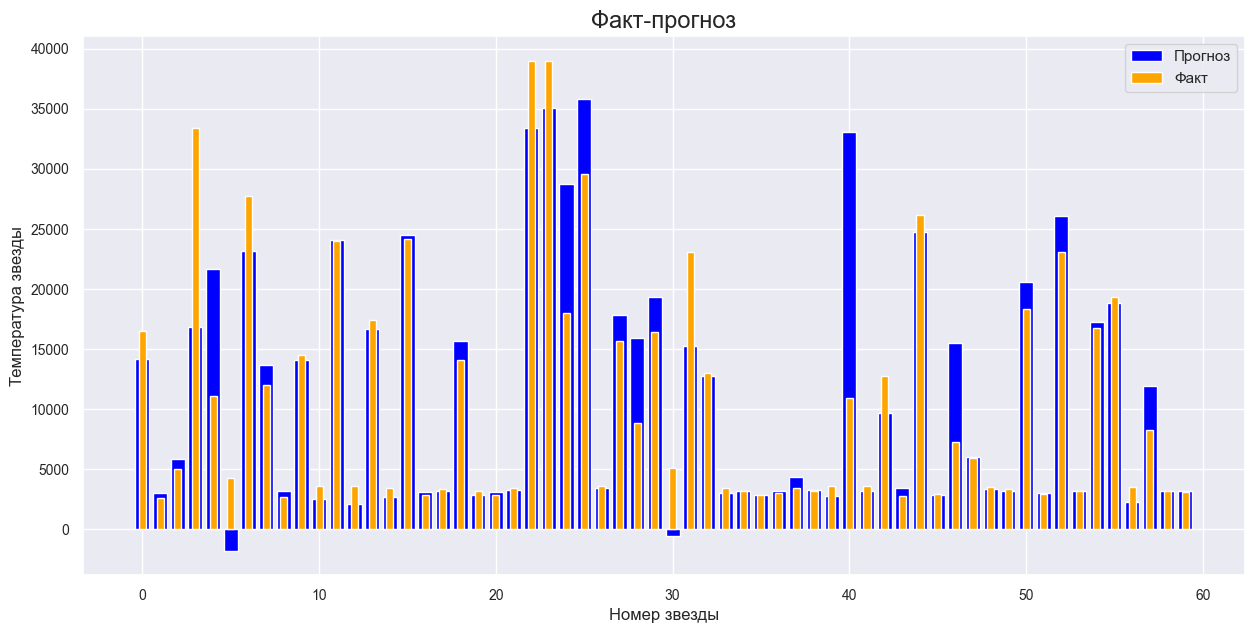

In [40]:
comparison_chart(predict_test)

Некоторые звезды ушли в минус по температуре. Такого не может быть.

## <b>Улучшение модели</b>

Количество слоев и функции активации оставлю как и в baseline. Добавлю Dropout и BatchNorm1d. Но не буду добавлять перебор батчей.

In [61]:
class Net(nn.Module):
    def __init__(self, n_in, n_1, n_2, n_out):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(n_in, n_1)
        self.dp1 = nn.Dropout(p = 0.1)
        self.bn1 = nn.BatchNorm1d(150)
        self.act1 = nn.Tanh()
        self.fc2 = nn.Linear(n_1, n_2)
        self.dp2 = nn.Dropout(p = 0.2)
        self.act2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(n_2, n_out)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.dp2(x)
        x = self.act2(x)
        x = self.fc3(x)

        return(x)


n_in = X_train.shape[1]
n_1 = 150
n_2 = 75
n_out = 1 

model = Net(n_in, n_1, n_2, n_out) 
optimizer = torch.optim.Adam(model.parameters(), lr =1e-3)
loss = nn.MSELoss()

num_epochs = 8000

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds_train = model.forward(X_train).flatten()
    
    rmse_train = torch.sqrt(loss(preds_train, y_train)) 
    rmse_train.backward()
    optimizer.step()
    
    if epoch % 1000 == 0 or epoch == num_epochs - 1:
        model.eval()
        predict_test_2 = model.forward(X_test).flatten()
        rmse_test = torch.sqrt(loss(predict_test_2, y_test))
        print('Эпоха №', epoch)
        print('RMSE эпохи -', torch.sqrt(loss(predict_test_2, y_test)).item(), '\n') 

Эпоха № 0
RMSE эпохи - 14695.6181640625 

Эпоха № 1000
RMSE эпохи - 6592.75390625 

Эпоха № 2000
RMSE эпохи - 4962.67919921875 

Эпоха № 3000
RMSE эпохи - 4800.68115234375 

Эпоха № 4000
RMSE эпохи - 4650.7041015625 

Эпоха № 5000
RMSE эпохи - 4456.26171875 

Эпоха № 6000
RMSE эпохи - 4554.0869140625 

Эпоха № 7000
RMSE эпохи - 4586.93359375 

Эпоха № 7999
RMSE эпохи - 4575.146484375 



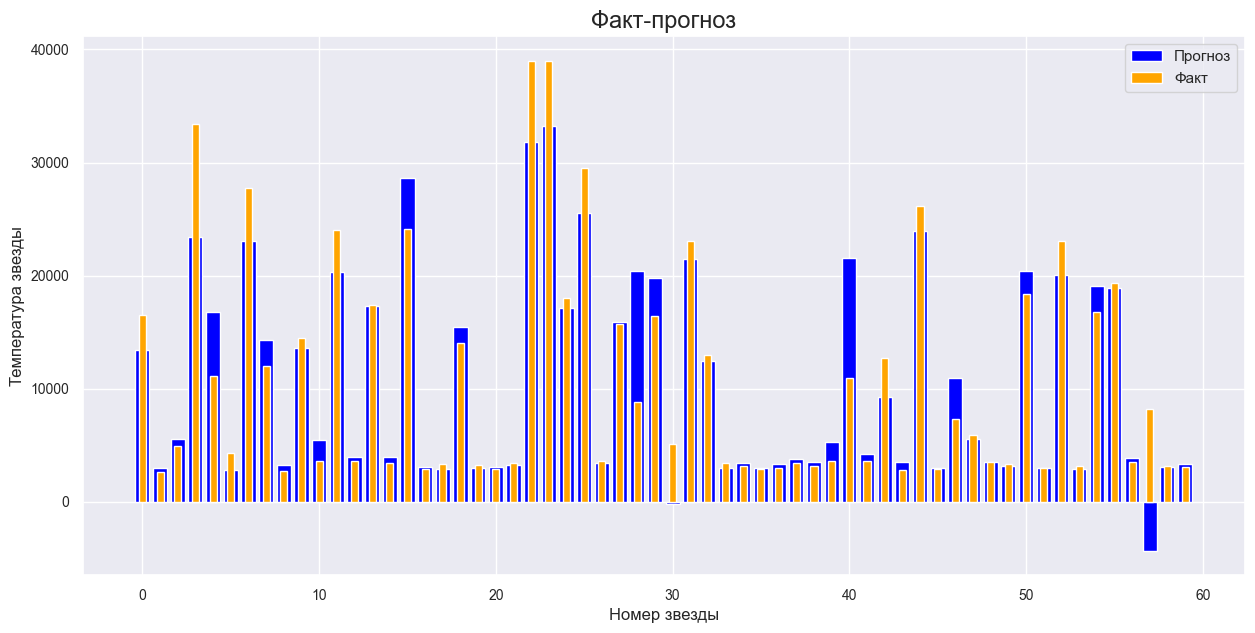

In [62]:
comparison_chart(predict_test_2)

Предсказаие завершилось на RMSE 4235 (что меньше желаемого порога в 4500). Лучшее RMSE было на 6000 эпохе - 4186.

Добавлю перебор батчей.

In [57]:
def train_model(batch_size):
    # Создаем новый DataLoader для текущего размера батча
    train_loader = DataLoader(
        TensorDataset(X_train, y_train),
        batch_size=batch_size,
        shuffle=True
    )
    
    # Инициализация новой модели для каждого размера батча
    model = Net(n_in, 150, 75, 1)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    loss_fn = torch.nn.MSELoss()
    
    num_epochs = 8000
    best_test_rmse = float('inf')
    
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            preds = model(X_batch).flatten()
            batch_loss = torch.sqrt(loss_fn(preds, y_batch))  # RMSE
            batch_loss.backward()
            optimizer.step()
            total_loss += batch_loss.item() * X_batch.size(0)
        
        epoch_rmse = total_loss / len(X_train)
        
        if epoch % 1000 == 0 or epoch == num_epochs - 1:
            model.eval()
            with torch.no_grad():
                pred_test = model(X_test).flatten()
                test_rmse = torch.sqrt(loss_fn(pred_test, y_test)).item()
                if test_rmse < best_test_rmse:
                    best_test_rmse = test_rmse
            
            print(f'Batch: {batch_size:3} | Epoch: {epoch:4} | '
                  f'Train RMSE: {epoch_rmse:.4f} | '
                  f'Test RMSE: {test_rmse:.4f}')
    
    return {'train_rmse': epoch_rmse, 'test_rmse': best_test_rmse}

# количество батчей для перебора
batch_sizes = [20, 40, 60, 80, 100]

# Запуск перебора и сохранение результатов
results = {bs: train_model(bs) for bs in batch_sizes}

# Вывод результатов
print("\nРезультаты для разных размеров батчей:")
for bs, metrics in results.items():
    print(f'Batch size: {bs} | Test RMSE: {metrics["test_rmse"]:.4f}')

Batch:  20 | Epoch:    0 | Train RMSE: 13858.7024 | Test RMSE: 14695.4902
Batch:  20 | Epoch: 1000 | Train RMSE: 3970.5163 | Test RMSE: 5639.5303
Batch:  20 | Epoch: 2000 | Train RMSE: 3269.8918 | Test RMSE: 5010.4058
Batch:  20 | Epoch: 3000 | Train RMSE: 3864.4499 | Test RMSE: 4966.4712
Batch:  20 | Epoch: 4000 | Train RMSE: 3001.9781 | Test RMSE: 5316.6309
Batch:  20 | Epoch: 5000 | Train RMSE: 2989.8728 | Test RMSE: 5112.2109
Batch:  20 | Epoch: 6000 | Train RMSE: 3514.6165 | Test RMSE: 4869.1528
Batch:  20 | Epoch: 7000 | Train RMSE: 3515.8368 | Test RMSE: 4979.2393
Batch:  20 | Epoch: 7999 | Train RMSE: 3703.7122 | Test RMSE: 5009.8501
Batch:  40 | Epoch:    0 | Train RMSE: 13908.9269 | Test RMSE: 14695.6689
Batch:  40 | Epoch: 1000 | Train RMSE: 9290.0919 | Test RMSE: 10125.5635
Batch:  40 | Epoch: 2000 | Train RMSE: 3858.6032 | Test RMSE: 5196.9321
Batch:  40 | Epoch: 3000 | Train RMSE: 3608.8404 | Test RMSE: 5322.3003
Batch:  40 | Epoch: 4000 | Train RMSE: 3315.4852 | Test RMS

Лучший результат имеет batch size - 80 с метрикой RMSE 4818. Но это метрика все-равно не дотягивает до модели без перебора параметров батчей. 


## <b>Сравнение графиков</b>

In [88]:
def comparison_chart_2(y_pred_1, y_pred_2):
    start = 0
    end = 60
    
    basic_df = y_test[start:end]
    nn_df_1 = y_pred_1[start:end]
    nn_df_2 = y_pred_2[start:end]

    plt.figure(figsize=(15, 7))
    plt.bar(range(start, end), basic_df, color='orange', width=1, label='Факт')
    plt.bar(range(start, end), nn_df_1.detach().numpy(), color='red', width=0.6, label='Базовая модель')
    plt.bar(range(start, end), nn_df_2.detach().numpy(), color='blue', width=0.4, label='Улучшенная модель')
    

    plt.legend()
    plt.title('Факт-прогноз', fontsize=17)
    plt.xlabel('Номер звезды', fontsize=12)
    plt.ylabel('Температура звезды', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

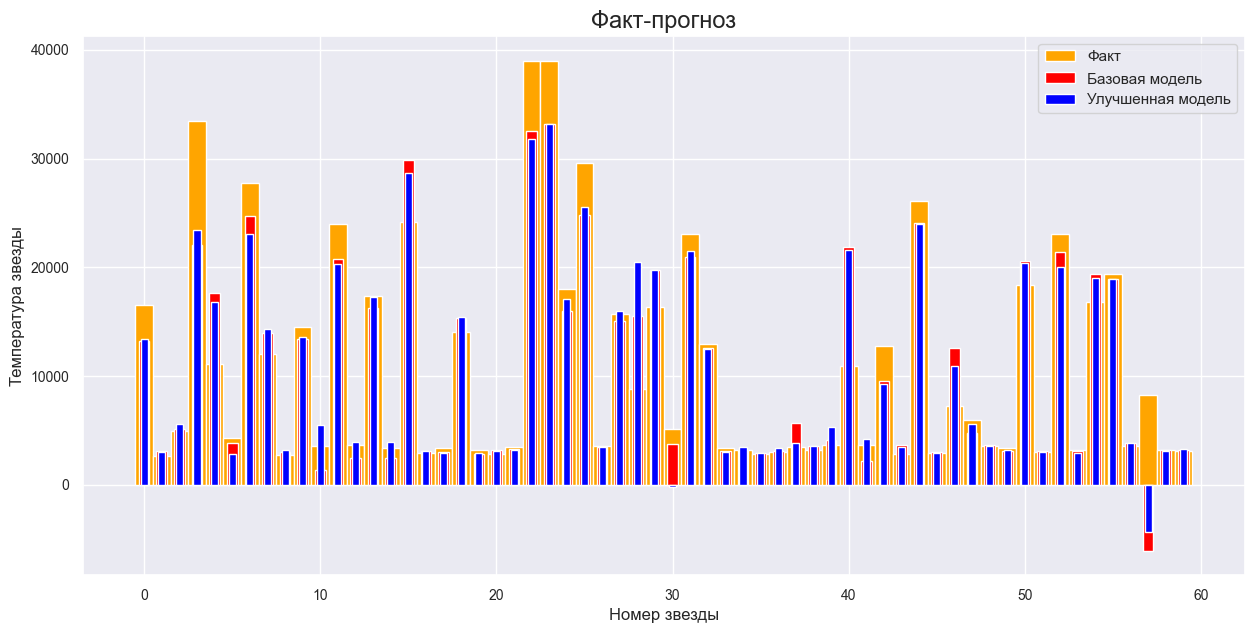

In [89]:
comparison_chart_2(predict_test, predict_test_2)

Местами баовая модельпредсказывала температуру звезды выше чем улушенная, не всегда такая температура была хуже. Иногда к настоящей температуре звезды базовая модель приближалась ближе чем улучшенная. Но улучшенная модель лучше предсказывает более холодные звёзды. 

## <b>Итоговый вывод</b>


Была загружена таблица <b>6_class.csv</b>
<br>Таблица состоит из 7 столбцов и 240 строк.
<br>Пропусков в таблице нет.
<br>Названия столбцов переведены в удобный вид. Неявные дубликаты в столбце <b>star_color</b> были обработаны в связи со следующими данными:
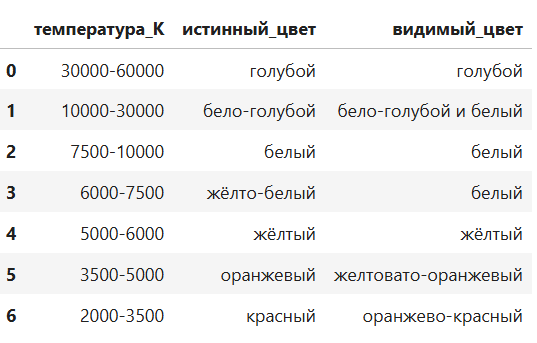
<br>Цвета были переведены в истинный цвет.
<br>------------------------------------------------------------------------------------------------------------------------------------------
<br>Были построены две модели НС - baseline и улучшеная её версия с Dropout и BatchNorm1d:
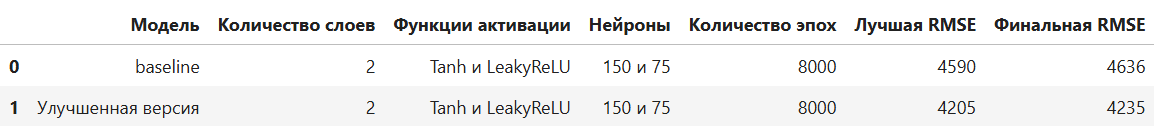
Лучше себя показала улучшенная модель. Для более лучшего предсказания рекомундуется обучить модель на более крупном датасете. 

